In [1]:
import gymnasium as gym
import sys
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

import numpy as np
from __future__ import annotations

root = Path.cwd()
if (root / "agents").exists():
    project_root = root
elif (root.parent / "agents").exists():
    project_root = root.parent
else:
    raise RuntimeError("Cannot locate project root containing 'agents' package'")

sys.path.insert(0, str(project_root))

from agents.black_jack_agent import BlackjackAgent
from utils.visualization import plot_training_stats
from utils.helpers import test_agent


In [2]:
# hyperparameters
learning_rate = 0.01
n_episodes = 500_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1


env = gym.make("Blackjack-v1", sab=False)
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)

agent = BlackjackAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [3]:
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action( obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 500000/500000 [00:27<00:00, 18387.36it/s]


In [4]:
test_agent(agent, env)

Test Results over 1000 episodes:
Win Rate: 44.4%
Average Reward: -0.020
Standard Deviation: 0.953


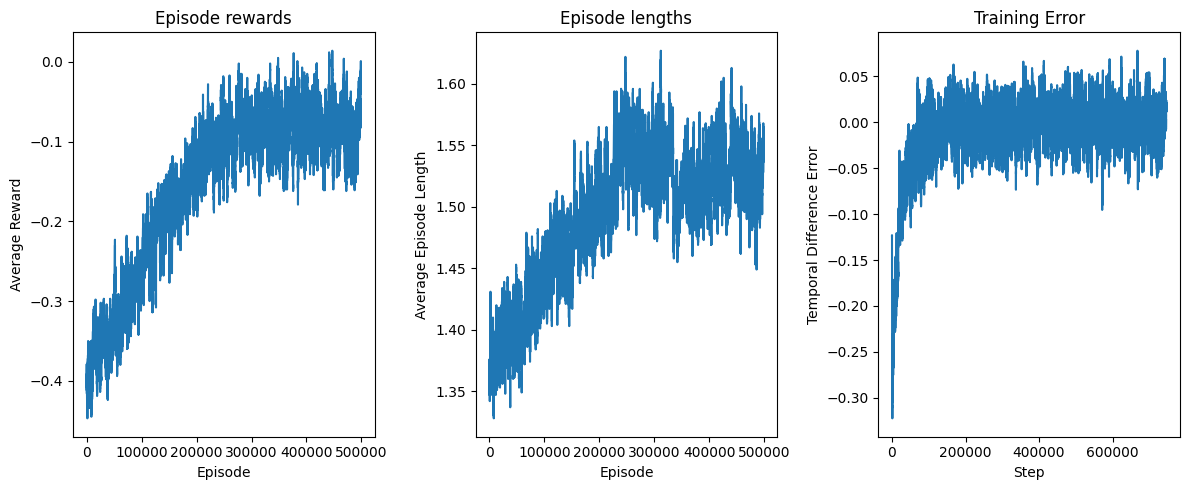

In [5]:
plot_training_stats(agent, env)